In [82]:
import os
import IPython
import librosa
import matplotlib.pyplot as plt
import numpy as np
from librosa import display
import audiosegment
from scipy import signal
import python_speech_features as features

In [3]:
data_path = '/home/anton/Documents/data_phon/'

In [107]:
y, sr = librosa.load('/home/anton/Documents/data_phon/TRAIN/DR1/FCJF0/SA1.WAV', sr=16000)
IPython.display.Audio(data=y[0:3050], rate=sr)

In [9]:
y.shape

(46797,)

In [10]:
sr

16000

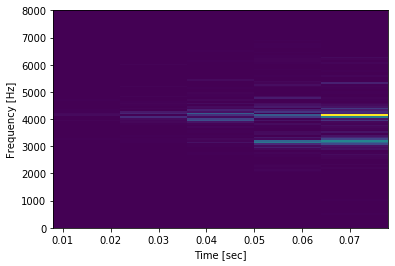

In [53]:
f, t, Sxx = signal.spectrogram(y[3050:4559], sr)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

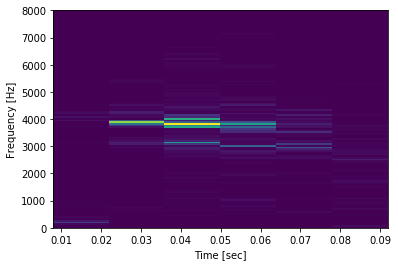

In [54]:
f, t, Sxx = signal.spectrogram(y[31719:33360], sr)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

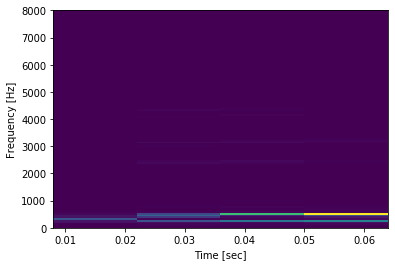

In [55]:
f, t, Sxx = signal.spectrogram(y[4559:5723], sr)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

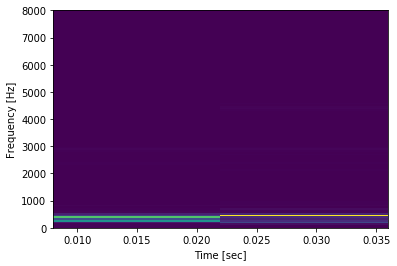

In [56]:
f, t, Sxx = signal.spectrogram(y[27156:28064], sr)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

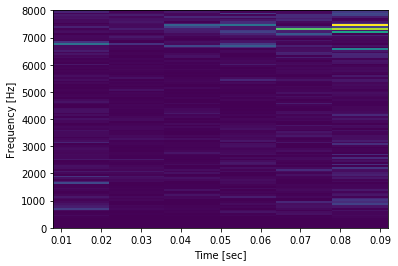

In [57]:
f, t, Sxx = signal.spectrogram(y[16334:18088], sr)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

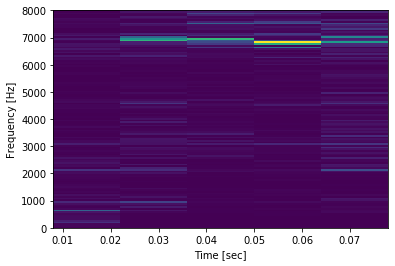

In [58]:
f, t, Sxx = signal.spectrogram(y[25566:27156], sr)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

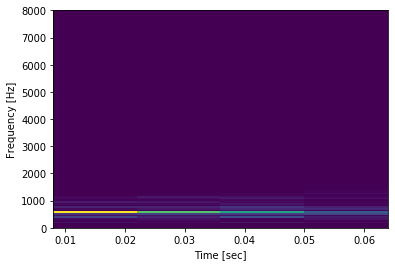

In [59]:
f, t, Sxx = signal.spectrogram(y[34715:36080], sr)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

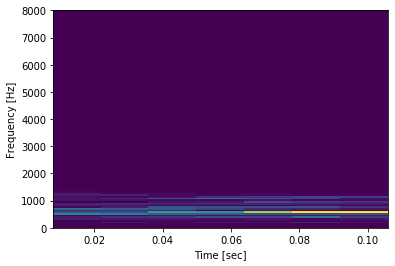

In [60]:
f, t, Sxx = signal.spectrogram(y[37556:39561], sr)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

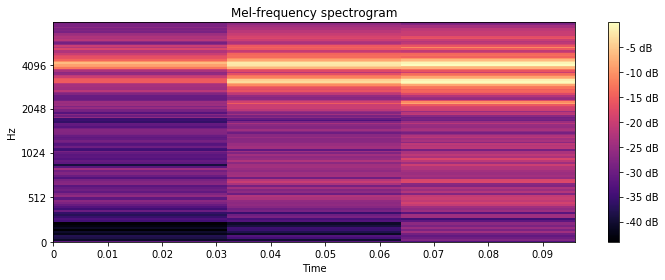

In [49]:
S = librosa.feature.melspectrogram(y=y[3050:4559], sr=sr, n_mels=128, fmax=8000)
plt.figure(figsize=(10, 4))
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

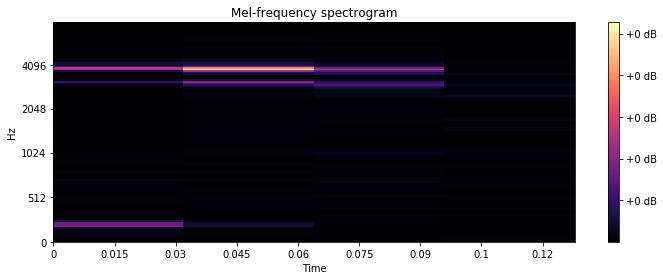

In [51]:
S = librosa.feature.melspectrogram(y=y[31719:33360], sr=sr, n_mels=128, fmax=8000)
plt.figure(figsize=(10, 4))
# S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

In [7]:
f = open('/home/anton/Documents/data_phon/TRAIN/DR1/FCJF0/SA1.PHN')

In [8]:
f.readlines()

['0 3050 h#\n',
 '3050 4559 sh\n',
 '4559 5723 ix\n',
 '5723 6642 hv\n',
 '6642 8772 eh\n',
 '8772 9190 dcl\n',
 '9190 10337 jh\n',
 '10337 11517 ih\n',
 '11517 12500 dcl\n',
 '12500 12640 d\n',
 '12640 14714 ah\n',
 '14714 15870 kcl\n',
 '15870 16334 k\n',
 '16334 18088 s\n',
 '18088 20417 ux\n',
 '20417 21199 q\n',
 '21199 22560 en\n',
 '22560 22920 gcl\n',
 '22920 23271 g\n',
 '23271 24229 r\n',
 '24229 25566 ix\n',
 '25566 27156 s\n',
 '27156 28064 ix\n',
 '28064 29660 w\n',
 '29660 31719 ao\n',
 '31719 33360 sh\n',
 '33360 33754 epi\n',
 '33754 34715 w\n',
 '34715 36080 ao\n',
 '36080 36326 dx\n',
 '36326 37556 axr\n',
 '37556 39561 ao\n',
 '39561 40313 l\n',
 '40313 42059 y\n',
 '42059 43479 ih\n',
 '43479 44586 axr\n',
 '44586 46720 h#\n']

In [83]:
def create_mfcc(sample, rate):
#     (rate,sample) = wav.read(filename)

    mfcc = features.mfcc(sample, rate, winlen=0.025, winstep=0.01, numcep = 13, nfilt=26, preemph=0.97, appendEnergy=True)

    derivative = np.zeros(mfcc.shape)
    for i in range(1, mfcc.shape[0]-1):
        derivative[i, :] = mfcc[i+1, :] - mfcc[i-1, :]

    out = np.concatenate((mfcc, derivative), axis=1)

    return out

In [85]:
create_mfcc(y[3050:4559], 16000).shape

(8, 26)

In [86]:
create_mfcc(y[3050:5559], 16000).shape

(15, 26)

In [87]:
import os
import shutil

In [88]:
data_path = '/home/anton/Documents/data_phon/TRAIN/'

In [103]:
phn_files = []
wav_files = []

In [104]:
for root, dirs, files in os.walk(data_path):
    for file in files:
        if file.endswith(".PHN"):
            phn_files.append(os.path.join(root, file))
            wav_files.append(root+'/'+file[:-4]+'.WAV') 

In [105]:
phn_files

['/home/anton/Documents/data_phon/TRAIN/DR2/MJDE0/SI490.PHN',
 '/home/anton/Documents/data_phon/TRAIN/DR2/MJDE0/SA2.PHN',
 '/home/anton/Documents/data_phon/TRAIN/DR2/MJDE0/SX220.PHN',
 '/home/anton/Documents/data_phon/TRAIN/DR2/MJDE0/SX400.PHN',
 '/home/anton/Documents/data_phon/TRAIN/DR2/MJDE0/SX310.PHN',
 '/home/anton/Documents/data_phon/TRAIN/DR2/MJDE0/SX40.PHN',
 '/home/anton/Documents/data_phon/TRAIN/DR2/MJDE0/SI1120.PHN',
 '/home/anton/Documents/data_phon/TRAIN/DR2/MJDE0/SI463.PHN',
 '/home/anton/Documents/data_phon/TRAIN/DR2/MJDE0/SX130.PHN',
 '/home/anton/Documents/data_phon/TRAIN/DR2/MJDE0/SA1.PHN',
 '/home/anton/Documents/data_phon/TRAIN/DR2/MDPS0/SX359.PHN',
 '/home/anton/Documents/data_phon/TRAIN/DR2/MDPS0/SA2.PHN',
 '/home/anton/Documents/data_phon/TRAIN/DR2/MDPS0/SX269.PHN',
 '/home/anton/Documents/data_phon/TRAIN/DR2/MDPS0/SI1651.PHN',
 '/home/anton/Documents/data_phon/TRAIN/DR2/MDPS0/SX89.PHN',
 '/home/anton/Documents/data_phon/TRAIN/DR2/MDPS0/SX449.PHN',
 '/home/anton/

In [106]:
wav_files

['/home/anton/Documents/data_phon/TRAIN/DR2/MJDE0/SI490.WAV',
 '/home/anton/Documents/data_phon/TRAIN/DR2/MJDE0/SA2.WAV',
 '/home/anton/Documents/data_phon/TRAIN/DR2/MJDE0/SX220.WAV',
 '/home/anton/Documents/data_phon/TRAIN/DR2/MJDE0/SX400.WAV',
 '/home/anton/Documents/data_phon/TRAIN/DR2/MJDE0/SX310.WAV',
 '/home/anton/Documents/data_phon/TRAIN/DR2/MJDE0/SX40.WAV',
 '/home/anton/Documents/data_phon/TRAIN/DR2/MJDE0/SI1120.WAV',
 '/home/anton/Documents/data_phon/TRAIN/DR2/MJDE0/SI463.WAV',
 '/home/anton/Documents/data_phon/TRAIN/DR2/MJDE0/SX130.WAV',
 '/home/anton/Documents/data_phon/TRAIN/DR2/MJDE0/SA1.WAV',
 '/home/anton/Documents/data_phon/TRAIN/DR2/MDPS0/SX359.WAV',
 '/home/anton/Documents/data_phon/TRAIN/DR2/MDPS0/SA2.WAV',
 '/home/anton/Documents/data_phon/TRAIN/DR2/MDPS0/SX269.WAV',
 '/home/anton/Documents/data_phon/TRAIN/DR2/MDPS0/SI1651.WAV',
 '/home/anton/Documents/data_phon/TRAIN/DR2/MDPS0/SX89.WAV',
 '/home/anton/Documents/data_phon/TRAIN/DR2/MDPS0/SX449.WAV',
 '/home/anton/

In [116]:
len(wav_files)

4620

In [108]:
starts = []
ends = []

In [110]:
for f_name in phn_files:
    f = open(f_name)
    lines = f.readlines()
    for i in range(1, len(lines)-1):
        starts.append(int(lines[i].split(' ')[0]))
        ends.append(int(lines[i].split(' ')[1]))
    f.close()

In [112]:
dist = [ends[i]-starts[i] for i in range(len(ends))]

In [113]:
len(dist)

167840

In [114]:
max(dist)

19603

In [115]:
min(dist)

36

In [117]:
sound_path = '/home/anton/Documents/phonemes/sounds/'
labels_path = '/home/anton/Documents/phonemes/labels/'

In [118]:
for i in range(len(phn_files)):
    shutil.copyfile(phn_files[i], labels_path + str(i) + '.PHN')
    shutil.copyfile(wav_files[i], sound_path + str(i) + '.WAV')

In [121]:
for file in wav_files:
    y, sr = librosa.load(file, sr=16000)
    f, t, Sxx = signal.spectrogram(y, sr)
    print(f)

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]
[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687

KeyboardInterrupt: 

In [130]:
one_sound_path = '/home/anton/Documents/new_test/1/3353.wav'
sound_path = '/home/anton/Documents/test/1/1904.wav'

In [131]:
s = audiosegment.from_file(sound_path)

In [132]:
len(s)

5000

In [137]:
y, sr = librosa.load(sound_path, sr=16000)

In [138]:
len(y)

80000

In [141]:
y[1000:1100]

array([ 0.00027466,  0.00161743,  0.00189209,  0.00042725, -0.00134277,
       -0.00210571, -0.00015259, -0.00045776, -0.00018311, -0.00057983,
       -0.00296021, -0.0022583 , -0.00054932, -0.00082397,  0.00125122,
        0.0017395 ,  0.00097656,  0.00057983,  0.00033569, -0.00027466,
        0.0007019 ,  0.00082397,  0.00091553, -0.00100708,  0.00042725,
       -0.00024414, -0.00076294,  0.00024414,  0.00073242,  0.00079346,
        0.00039673,  0.00109863,  0.0005188 ,  0.00106812,  0.00180054,
        0.00115967,  0.00097656, -0.00097656, -0.00057983, -0.00033569,
        0.00057983,  0.00198364,  0.00088501, -0.00064087, -0.00143433,
       -0.00057983, -0.00024414,  0.0010376 ,  0.00073242, -0.00048828,
       -0.00125122, -0.00219727, -0.00018311,  0.00012207,  0.00018311,
        0.00057983,  0.00073242,  0.00140381, -0.0012207 ,  0.00253296,
        0.00280762,  0.0022583 ,  0.00198364, -0.00021362, -0.00018311,
       -0.00082397,  0.00042725,  0.00177002,  0.00146484,  0.00